# This notebook is for visulizing GWAS results

## 1. Check the LDL TR GWAS signal from AWIGEN
## 2. Compare the AWIGEN LDL TR GWAS to the UKB African LDL GWAS

In [2]:
import pandas as pd
from qmplot import manhattanplot
import matplotlib.pyplot as plt

In [3]:
chrom=1
awigen_ldl=pd.DataFrame()
sig_p=5e-8
for chrom in range(1,23):
    curr_file=f"/expanse/protected/gymreklab-dbgap/mount/H3Africa/DS_I_Africa_project/from_ilifu/results/GWAS/associations/ldl_c/merged_chr{chrom}_TRs_gwas.friedewald_ldl_c_c_qc.glm.linear"
    curr_df=pd.read_csv(curr_file,sep="\t")
    curr_df=curr_df[curr_df['ERRCODE']!='CONST_OMITTED_ALLELE'].copy()
    curr_df.drop(columns="ERRCODE",inplace=True)
    awigen_ldl=pd.concat([awigen_ldl,curr_df],ignore_index=True)
    if len(curr_df[curr_df.P<sig_p])>0:
        print(f'chr{chrom} :{len(curr_df[curr_df.P<sig_p])}')

chr1:1
chr13:1
chr19:9


In [7]:
ukb_afr="/expanse/protected/gymreklab-dbgap/mount/H3Africa/DS_I_Africa_project/from_ilifu/other_gwas_results/margoliash-et-al-2023/black_ldl_cholesterol_direct_str_gwas_results.tab"
afr_ldl=pd.read_csv(ukb_afr,sep="\t")
afr_ldl.rename(columns={"chromosome":"#CHROM","start_pos (hg38)":"POS","p_value":"P"},inplace=True)
afr_ldl["#CHROM"]=afr_ldl["#CHROM"].astype(str)
afr_ldl["ID"]=afr_ldl.apply(lambda x: f'{x["#CHROM"]}:{x["POS"]}:{x["repeat_unit"]}',axis=1)

Text(0.5, 1.0, 'UKB (African) LDL GWAS')

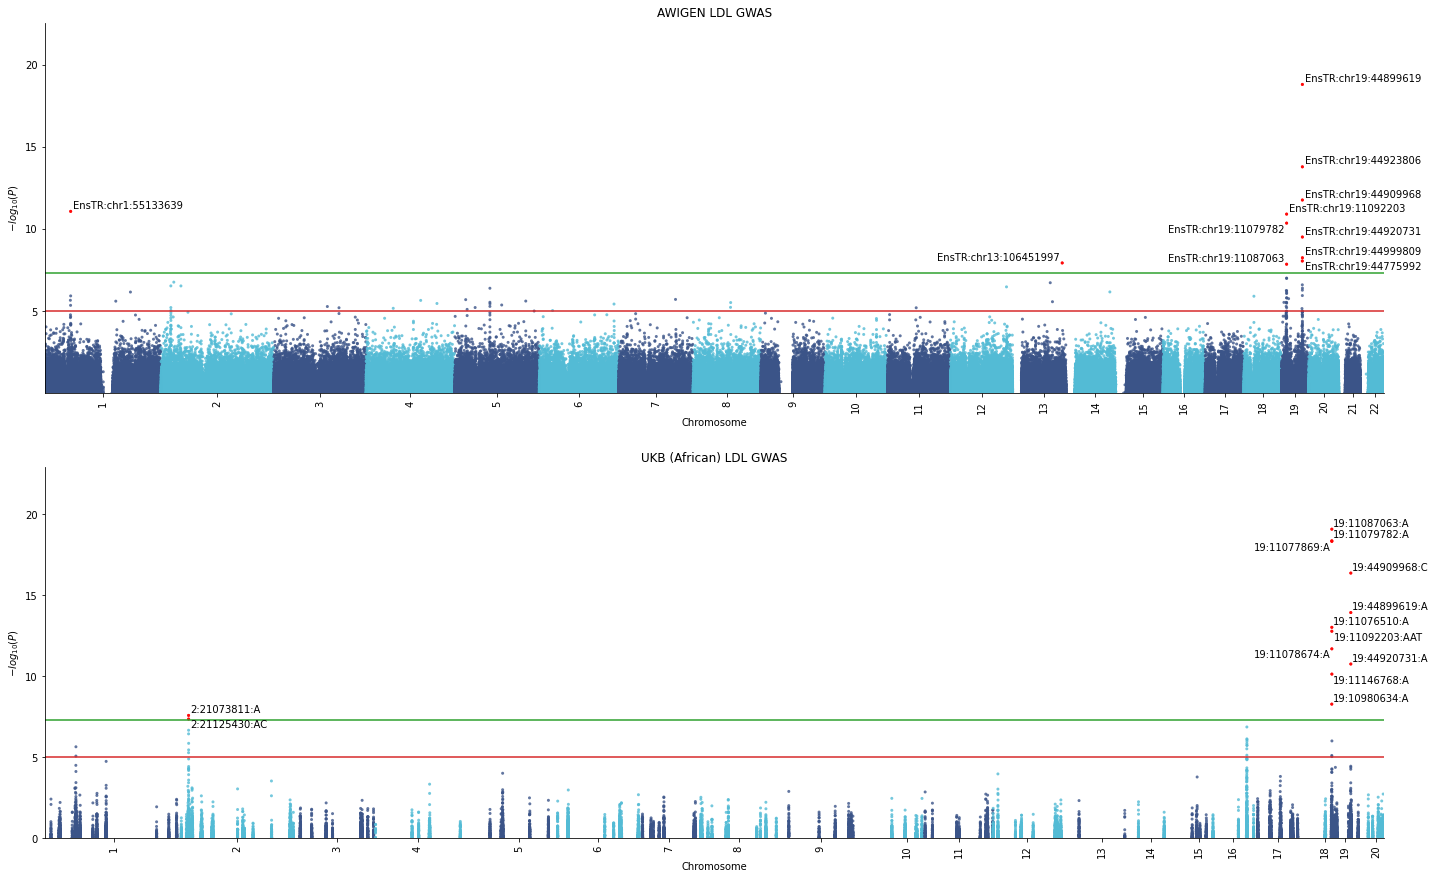

In [21]:
sig_p=5e-8
f, ax = plt.subplots(2,1,figsize=(24, 15))
ax_list=ax.flatten()
manhattanplot(data=awigen_ldl,
              sign_marker_p=sig_p,
              is_annotate_topsnp=True,
              ld_block_size=100,
              xticklabel_kws={"rotation": "vertical"},
              ax=ax_list[0])
ax_list[0].set_title("AWIGEN LDL GWAS")

manhattanplot(data=afr_ldl,
              sign_marker_p=sig_p,
              is_annotate_topsnp=True,
              ld_block_size=100,
              xticklabel_kws={"rotation": "vertical"},
              ax=ax_list[1])
ax_list[1].set_title("UKB (African) LDL GWAS")

gwas signals between two studies

In [25]:
awigen_ldl[(awigen_ldl.P<5e-8) & (awigen_ldl['#CHROM']=="19")].merge(afr_ldl[(afr_ldl.P<5e-8) & (afr_ldl['#CHROM']=="19")][["#CHROM","POS"]],on=["#CHROM","POS"])

,#CHROM,POS,ID,REF,ALT,PROVISIONAL_REF?,A1,OMITTED,A1_FREQ,TEST,OBS_CT,BETA,SE,L95,U95,T_STAT,P
0,19,11079782,EnsTR:chr19:11079782,A,T,Y,A,T,0.394510,ADD,10249,-0.188155,0.028525,-0.244062,-0.132248,-6.59623,4.425650e-11
1,19,11087063,EnsTR:chr19:11087063,A,T,Y,T,A,0.404547,ADD,10249,-0.262552,0.046241,-0.353183,-0.171922,-5.67791,1.400630e-08
2,19,11092203,EnsTR:chr19:11092203,A,T,Y,T,A,0.385800,ADD,10249,-0.211704,0.031215,-0.272885,-0.150523,-6.78205,1.250230e-11
3,19,44899619,EnsTR:chr19:44899619,A,T,Y,T,A,0.333745,ADD,10249,0.255920,0.028261,0.200529,0.311311,9.05552,1.606620e-19
4,19,44909968,EnsTR:chr19:44909968,A,T,Y,A,T,0.496046,ADD,10249,0.269219,0.038117,0.194510,0.343928,7.06288,1.736900e-12
5,19,44920731,EnsTR:chr19:44920731,A,T,Y,A,T,0.149951,ADD,10249,-0.383494,0.060871,-0.502800,-0.264188,-6.30007,3.097380e-10
